In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyod.models.iforest import IForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

In [2]:
thyroid = pd.read_csv(r'C:\Users\purav\OneDrive\Desktop\Comparative Evaluation of Anomaly Detection Algorithms\Comparative-Evaluation-of-Anomaly-Detection-Algorithms\Datasets\annthyroid-unsupervised-ad.csv',header = None)

In [3]:
thyroid

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.45,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.06100,0.0060,0.023,0.087,0.026,o
1,0.61,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.02900,0.0150,0.061,0.096,0.064,o
2,0.16,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.02900,0.0190,0.058,0.103,0.056,o
3,0.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.11400,0.0030,0.024,0.061,0.039,o
4,0.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.04900,0.0030,0.005,0.116,0.004,o
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6911,0.65,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00047,0.0080,0.154,0.075,0.204,n
6912,0.77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00006,0.0206,0.125,0.107,0.117,n
6913,0.41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00130,0.0250,0.125,0.114,0.109,n
6914,0.64,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00078,0.0206,0.106,0.088,0.121,n


In [4]:
shuffled_df = thyroid.sample(frac=1).reset_index(drop=True)
shuffled_df


df = pd.DataFrame(shuffled_df.iloc[:, :-1].values)
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(df))



In [5]:
y = shuffled_df.iloc[:,-1]
y = pd.DataFrame(y.replace({'o':1, 'n':0}))
y

,21
0,0
1,0
2,0
3,0
4,0
...,...
6911,0
6912,0
6913,0
6914,0


In [6]:
accuracies = []
auc_scores = []
for i in range(10):
  iforest = IForest()
  iforest.fit(df)
  iforest_pred = iforest.labels_
  iforest_scores = iforest.decision_scores_
  
  iforest_accuracy = accuracy_score(y,iforest_pred)
  roc_auc = roc_auc_score(y, iforest_scores)

  accuracies.append(iforest_accuracy)
  auc_scores.append(roc_auc)

avg_accuracy = np.mean(accuracies)
avg_auc = np.mean(auc_scores)
  
print(avg_accuracy)
print(avg_auc)

0.8815211104684788
0.6602004800480048


In [6]:
iforest = IForest()
iforest.fit(df)

IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

In [7]:
iforest_pred = iforest.labels_
iforest_accuracy = accuracy_score(y,iforest_pred)
print(iforest_accuracy)

0.8825910931174089


In [8]:
iforest_scores = iforest.decision_scores_

F1-score: 0.14
0.6557797779777977


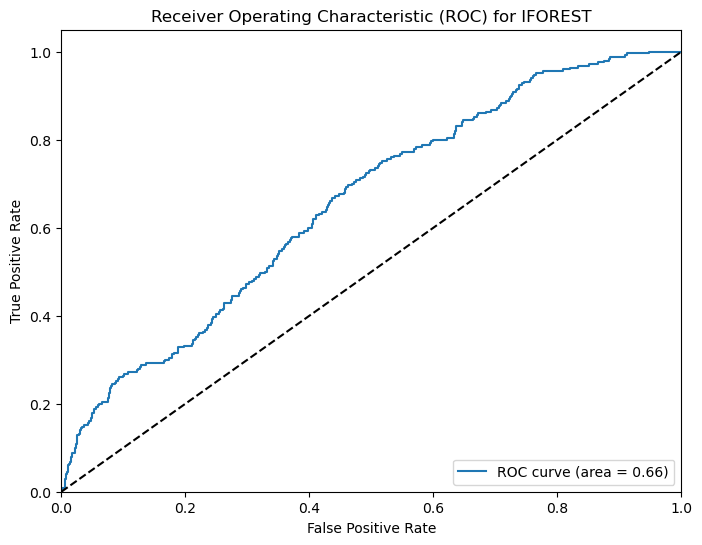

In [9]:
ifor_f1 = f1_score(y, iforest_pred)
print(f"F1-score: {ifor_f1:.2f}")

roc_auc = roc_auc_score(y, iforest_scores)
print(roc_auc)
ifor_fpr, ifor_tpr, _ = roc_curve(y, iforest_scores)

plt.figure(figsize=(8, 6))
plt.plot(ifor_fpr, ifor_tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for IFOREST')
plt.legend(loc="lower right")
plt.show()